# This notebook is the solution for Exercise 1 of the book - Neuronal Dynamics.

By Hrithik Nambiar

nr of spikes: 0


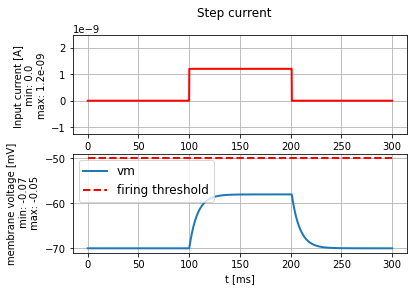

nr of spikes: 5


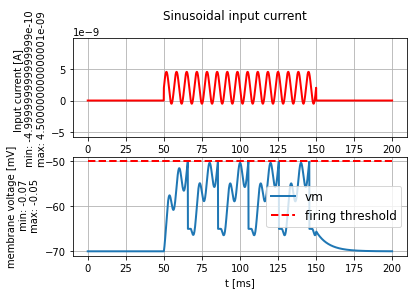

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

## 1.1. Minimal current

In [5]:
#default values
# V_REST = -70*b2.mV
# V_RESET = -65*b2.mV
# FIRING_THRESHOLD = -50*b2.mV
# MEMBRANE_RESISTANCE = 10. * b2.Mohm
# MEMBRANE_TIME_SCALE = 8. * b2.ms
# ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

In [6]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


In [7]:
print("firing threshhold : {}".format(LIF.FIRING_THRESHOLD))
print('Membrane resistance: {}'.format(LIF.MEMBRANE_RESISTANCE))

firing threshhold : -0.05
Membrane resistance: 10000000.0


In [8]:
I_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE
print('The minimal current for firing is: {}'.format(I_min))

The minimal current for firing is: 2.0000000000000005e-09


## 1.1.2 Simulation I_min

nr of spikes: 0


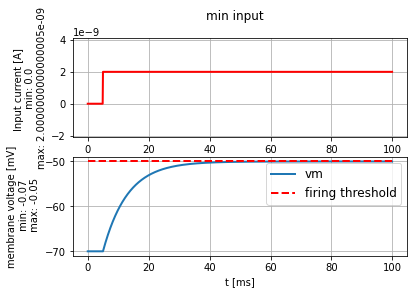

In [9]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude=I_min)  # set I_min 

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

# 1.2 --  F-I curve

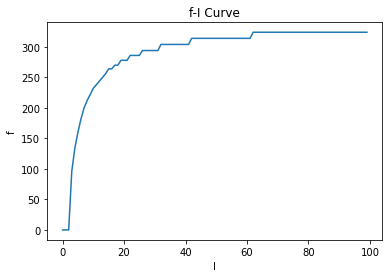

In [10]:
spike_count = []

for I in range(0, 100):
    step_current = input_factory.get_step_current(t_start=0, t_end=500, unit_time=b2.ms, amplitude = I * b2.namp) #acc to 1.2.1 q3
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms, 
                                                             abs_refractory_period=3 * b2.ms)
    spike_count.append(spike_monitor.count[0] / 0.5)
    
current_val = [i for i in range(0, 100)]

plt.plot(current_val, spike_count)
plt.title("f-I Curve")
plt.xlabel("I")
plt.ylabel("f")
plt.show()

q2 : What is the maximum rate at which this neuron can fire?

Ans : Since Refractory index is set to 3ms, the max rate = 1/0.003 = 333.33 Hz. This is evident from the graph.

q3:Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

Ans : plotted above.

# 1.3. Experimentally estimate the parameters of a LIF neuron

Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. To be 
determined.

Note that the simulation runs for a fixed duration of 50ms.

(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 9.000000000000001e-09'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.068\n max: -0.016007323346363622'>)

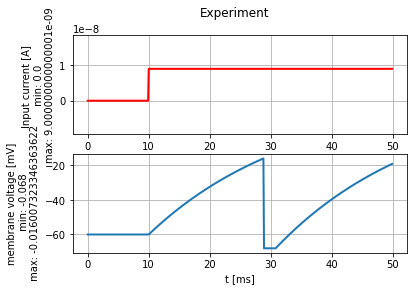

In [24]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(t_start= 10 , t_end= 100 , unit_time=b2.ms, amplitude= 9 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="Experiment")

# print the parameters to the console and compare with your estimates


Prediction from the plots (Approx):

Resting potential: -60mV

Reset voltage: -70mV

Firing threshold: -15mV 

Absolute refractory period: 3ms

From the above 2 graphs, we can formulate two equations for the Membrane Potential,

and solve it to get values of Membrane Resistance and Membrane Time Scale
#### $ϑ - u_{rest} =  R I_{0} ( 1 - e^{\frac{-t}{T_{m}}})$ 

Putting values of t = 40, I = 6 in first and t = 18, I = 9 in second

with other values from above observation, We get the values of R and $T_{m}$ as

#### $Membrane-resistance: \approx 8.95 * 10^6$
#### $Membrane-time-scale: \approx 0.022$


In [17]:
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


# 1.4  Sinusoidal input current and subthreshold response

nr of spikes: 0


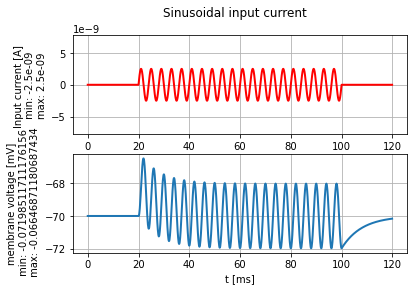

In [26]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=10*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

Amplitude: -68mV

Phase: 0 ( Approx )


# 1.4.2.

For input frequencies between 10Hz and 1 kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

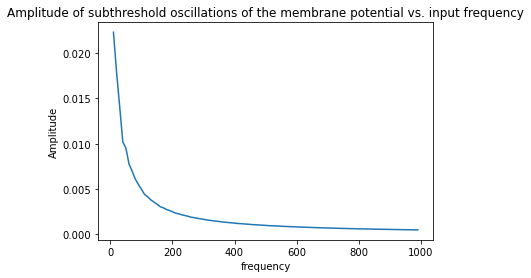

In [35]:
amps = []
for freq in range(10, 1000, 10):
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    pos_peaks_mean = state_monitor.v[0][find_peaks(state_monitor.v[0])[0]].mean()
    neg_peaks_mean = state_monitor.v[0][find_peaks(-state_monitor.v[0])[0]].mean()

    amplitude = (pos_peaks_mean - neg_peaks_mean) / 2
    amps.append(amplitude)
    
    
plt.plot([freq for freq in range(10, 1000, 10)], amps)
plt.title("Amplitude of subthreshold oscillations of the membrane potential vs. input frequency")
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.show()

# 1.4.3

For input frequencies between 10Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.

In [29]:
from scipy import signal, fftpack    
import numpy as np
def find_phase_shift(a, b):
    phase_shift_raw = np.argmax(signal.correlate(b, a))
    signal_length = len(a) - 1
    phase_shift = phase_shift_raw - signal_length 
    return phase_shift

In [30]:
input_frequency_list = np.linspace(10, 1000, 50)
phase_shift_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, 
                                                             firing_threshold=0*b2.mV)
    
    current_val = np.asarray(sinusoidal_current.values)
    current_val = np.squeeze(current_val)
    
    voltage_val = np.asarray(state_monitor.v[0])
    # voltage_val = voltage_val[200:1000] # only when current is ON
    
    phase_shift_no_units = find_phase_shift(current_val, voltage_val)
    phase_shift = phase_shift_no_units * 0.1 * b2.ms 
    phase_shift_list.append(phase_shift)

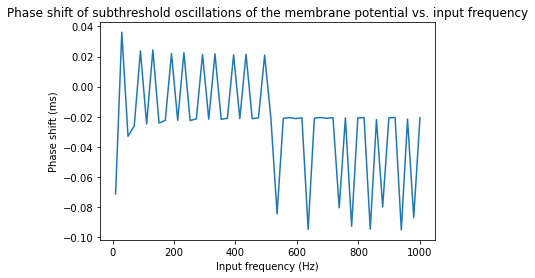

In [33]:
plt.figure()
plt.title("Phase shift of subthreshold oscillations of the membrane potential vs. input frequency")
plt.plot(input_frequency_list, phase_shift_list)
plt.ylabel('Phase shift (ms)')
plt.xlabel('Input frequency (Hz)')
plt.show()

# 1.4.4

To what type of filter (High-Pass, Low-Pass) does this correspond to?

Ans: Low-pass, from f-A plot.